## Prediction Diabetis

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load and review information


In [2]:
df = pd.read_csv("pima-data.csv")

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.isnull().values.any()

False

In [6]:
def plot_corr(df, size=11):
    """ Function plots graphical correlation matrix
    
    Inputs: 
    df = Pandas dataframe
    size = vertical and horizontal size of the plot
    
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)



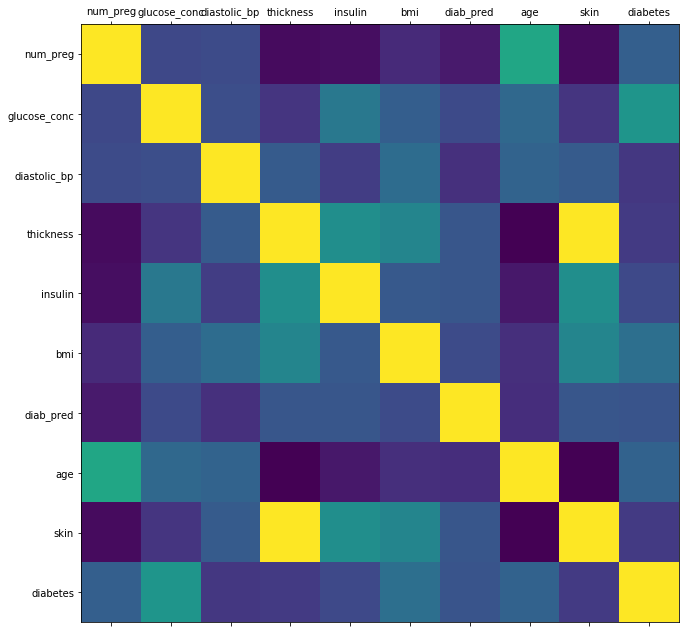

In [7]:
plot_corr(df)

In [8]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [10]:
del df['skin']

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


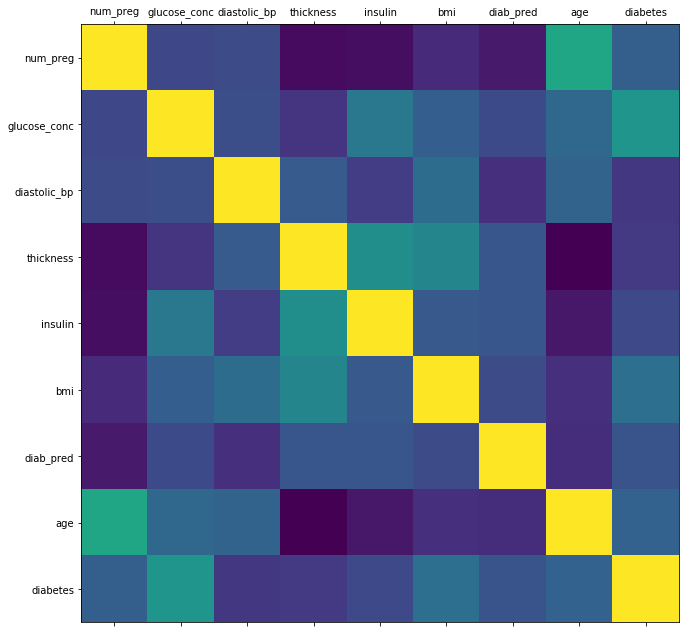

In [12]:
plot_corr(df)

## Check Data Types
La informacion discrecional se revisa, cuando se hace regresion lineal, se tienen que ajustar los columnas que tienen informacion que no es un numero, en este caso, la columna diabetes sus valores son True o False. Se cambiaran a 1 (True) o 0 (False)  


In [13]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [14]:
diabetes_map = {True:1, False:0}

In [15]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio


In [17]:
num_true  = len(df.loc[df['diabetes']== True])
num_false = len(df.loc[df['diabetes']== False])

In [18]:
print("Number of True cases {0} ({1:2.2f}%)".format(num_true,(num_true/(num_true + num_false))*100))
print("Number of False cases {0} ({1:2.2f}%)".format(num_false,(num_false/(num_true + num_false))*100))

Number of True cases 268 (34.90%)
Number of False cases 500 (65.10%)


## Fit ( ) training 
## Predict () prediccion

## Del total de algoritmos disponibles (50), dependiendo de el objectivo es que se elige. De inicio, tiene que ser aprendizaje supervisado.

## Splitting the data 

70 % traing, 30 % test

In [19]:
from sklearn.model_selection import train_test_split 

feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_name = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_name].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [20]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))*100))


69.92% in training set
30.08% in test set


## Verifying predicted value was splitted correctly

In [21]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


## Post-split data preparation

    Hidden missing values
    Se encuentran valores en 0, como en el caso del elemento 2 (thickness).

In [22]:
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
print("# rows in the dataframe {0}".format(len(df)))
print("# row missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc']==0])))
print("# row missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp']==0])))
print("# row missing thickness: {0}".format(len(df.loc[df['thickness']==0])))
print("# row missing insulin: {0}".format(len(df.loc[df['insulin']==0])))
print("# row missing bmi: {0}".format(len(df.loc[df['bmi']==0])))
print("# row missing diab_pred: {0}".format(len(df.loc[df['diab_pred']==0])))
print("# row missing age: {0}".format(len(df.loc[df['age']==0])))

# rows in the dataframe 768
# row missing glucose_conc: 5
# row missing diastolic_bp: 35
# row missing thickness: 227
# row missing insulin: 374
# row missing bmi: 11
# row missing diab_pred: 0
# row missing age: 0


If there are missing values, there are imputing (filling with another information)
* Replace with the median, mean
* Replace with expert knowledge derived value

In this case we use mean imputing
## Mean imputting

In [24]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
#Axis = 0 means columns
fill_0 = Imputer(missing_values=0, strategy='mean', axis=0) 

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Training Initial Algorithm - Nayes Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Naive Bayes model object and trainit with data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Perfomance on training

In [26]:
#predict values using training data
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



## Perfomance on test data

In [27]:
#predict values using training data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7359



### Metrics

In [28]:
print("Confusion matrix ")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test)))
print(" ")

print("Classifcation report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion matrix 
[[118  33]
 [ 28  52]]
 
Classifcation report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Predict training data

In [32]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))

Accuracy 0.9870


## Predict test data

In [33]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))

Accuracy 0.7100


In [34]:
print("Confusion matrix ")
print("{0}".format(metrics.confusion_matrix(y_test,rf_predict_test)))
print(" ")

print("Classifcation report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion matrix 
[[121  30]
 [ 37  43]]
 
Classifcation report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

   micro avg       0.71      0.71      0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231

